In [1]:
import pandas
import numpy
from matplotlib import pyplot
import os
import ROOT

Welcome to JupyROOT 6.24/06


# Python timer

In [9]:
times = {"cores":[],"mean":[],"meanerr":[],"throughput_GB_s":[]}
timedir = "20211117-singlenode-hl_d101-taskset031/appruntimes"

readsize = 225881515200
for f in os.listdir(timedir):
    array = numpy.genfromtxt(timedir+"/"+f, skip_header=1)
    nodes = f.split("_")[5].replace("cores.csv","")
    time_mean = numpy.mean(array)
    times["cores"].append(int(nodes))
    times["mean"].append(round(time_mean, 2))
    times["meanerr"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_GB_s"].append(readsize/time_mean/pow(10, 9))
    
timesdf_nopinning = pandas.DataFrame(times)
timesdf_nopinning = timesdf_nopinning.sort_values(by="cores").reset_index(drop=True).copy()

throughput_1node = timesdf_nopinning["throughput_GB_s"][0]
timesdf_nopinning["throughputspeedup"] = timesdf_nopinning["throughput_GB_s"] / throughput_1node
timesdf_nopinning

,cores,mean,meanerr,throughput_GB_s,throughputspeedup
0,1,313.78,5.02,0.719865,1.000000
1,2,169.68,3.96,1.331227,1.849274
2,4,94.98,0.78,2.378237,3.303728
3,6,66.89,0.69,3.376848,4.690949
4,8,52.05,0.83,4.340064,6.029000
5,10,44.28,0.26,5.101439,7.086665
6,12,43.29,0.43,5.217681,7.248142
7,14,43.88,0.31,5.148153,7.151558
8,16,43.57,0.22,5.184587,7.202170


In [10]:
times = {"cores":[],"mean":[],"meanerr":[],"throughput_GB_s":[]}
timedir = "20211117-singlenode-hl_d101-taskset08152431/appruntimes"

readsize = 225881515200
for f in os.listdir(timedir):
    array = numpy.genfromtxt(timedir+"/"+f, skip_header=1)
    nodes = f.split("_")[5].replace("cores.csv","")
    time_mean = numpy.mean(array)
    times["cores"].append(int(nodes))
    times["mean"].append(round(time_mean, 2))
    times["meanerr"].append(round(numpy.std(array)/numpy.sqrt(len(array)), 2))
    times["throughput_GB_s"].append(readsize/time_mean/pow(10, 9))
    
timesdf_numanode1 = pandas.DataFrame(times)
timesdf_numanode1 = timesdf_numanode1.sort_values(by="cores").reset_index(drop=True).copy()
timesdf_numanode1

throughput_1node = timesdf_numanode1["throughput_GB_s"][0]
timesdf_numanode1["throughputspeedup"] = timesdf_numanode1["throughput_GB_s"] / throughput_1node
timesdf_numanode1

,cores,mean,meanerr,throughput_GB_s,throughputspeedup
0,1,280.87,5.22,0.804230,1.000000
1,2,150.17,2.19,1.504130,1.870273
2,4,92.09,1.24,2.452944,3.050052
3,6,65.72,0.72,3.437267,4.273984
4,8,52.29,0.86,4.319454,5.370918
5,10,51.42,0.57,4.393176,5.462587
6,12,46.44,0.48,4.863478,6.047371
7,14,41.85,0.34,5.397279,6.711113
8,16,42.34,0.30,5.334874,6.633517


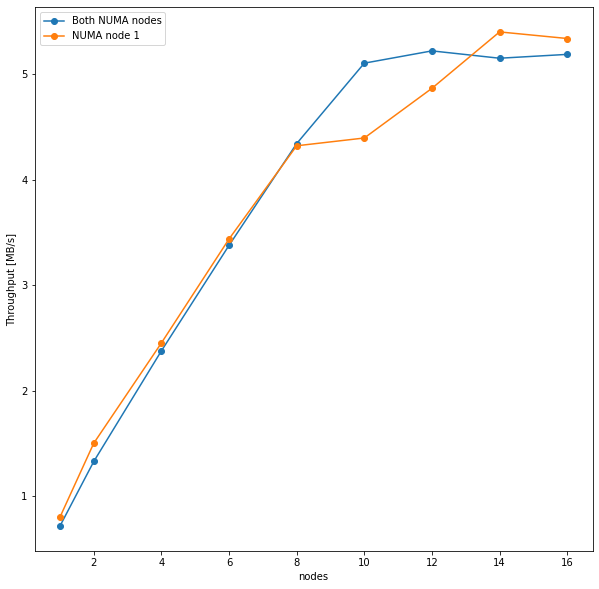

In [11]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_nopinning["cores"], timesdf_nopinning["throughput_GB_s"], label="Both NUMA nodes", marker="o")
pyplot.plot(timesdf_numanode1["cores"], timesdf_numanode1["throughput_GB_s"], label="NUMA node 1", marker="o")
pyplot.xlabel("nodes")
pyplot.ylabel("Throughput [MB/s]")
pyplot.legend()

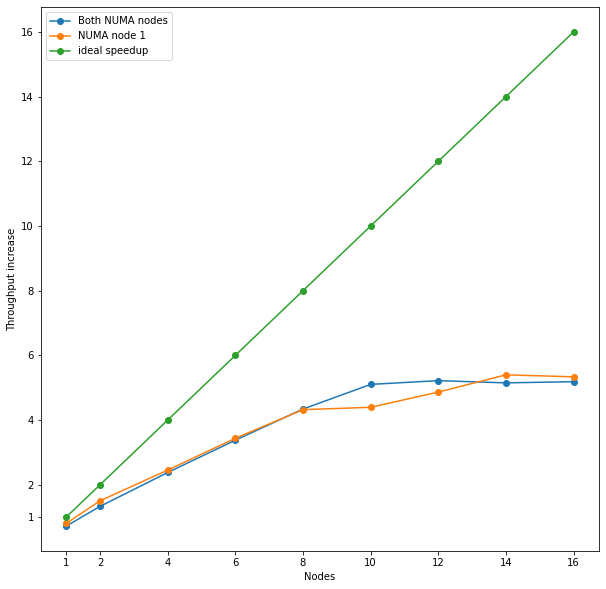

In [12]:
pyplot.figure(figsize=[10,10])
pyplot.plot(timesdf_nopinning["cores"], timesdf_nopinning["throughput_GB_s"], label="Both NUMA nodes", marker="o")
pyplot.plot(timesdf_numanode1["cores"], timesdf_numanode1["throughput_GB_s"], label="NUMA node 1", marker="o")
pyplot.plot(timesdf_nopinning["cores"], timesdf_nopinning["cores"], label="ideal speedup", marker="o")
pyplot.xticks(timesdf_nopinning["cores"])
pyplot.yticks(timesdf_nopinning["cores"])
pyplot.xlabel("Nodes")
pyplot.ylabel("Throughput increase")
pyplot.legend()